# Lenear Regression 실습
* 집값에 대한 회귀모형
* X 변수가 여러 개인 Multiple Lenear Regression

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression

df = pd.read_csv('data/manhattan.csv')
df.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


In [2]:
#X 데이터와 y 데이터 분리
df = df.drop(['rental_id','neighborhood','borough'], axis=1)

X = df.drop(['rent'], axis=1)
y=df[['rent']]

X

,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
0,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1
1,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0
2,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0
3,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1
4,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,1.0,1,532,3,8.0,16,1,1,1,1,1,1,0,1
3535,2.0,2,988,5,10.0,9,1,1,1,1,1,1,0,1
3536,0.0,1,250,2,5.0,96,0,0,0,0,0,0,0,0
3537,1.0,1,651,6,5.0,14,1,0,1,1,1,1,0,1


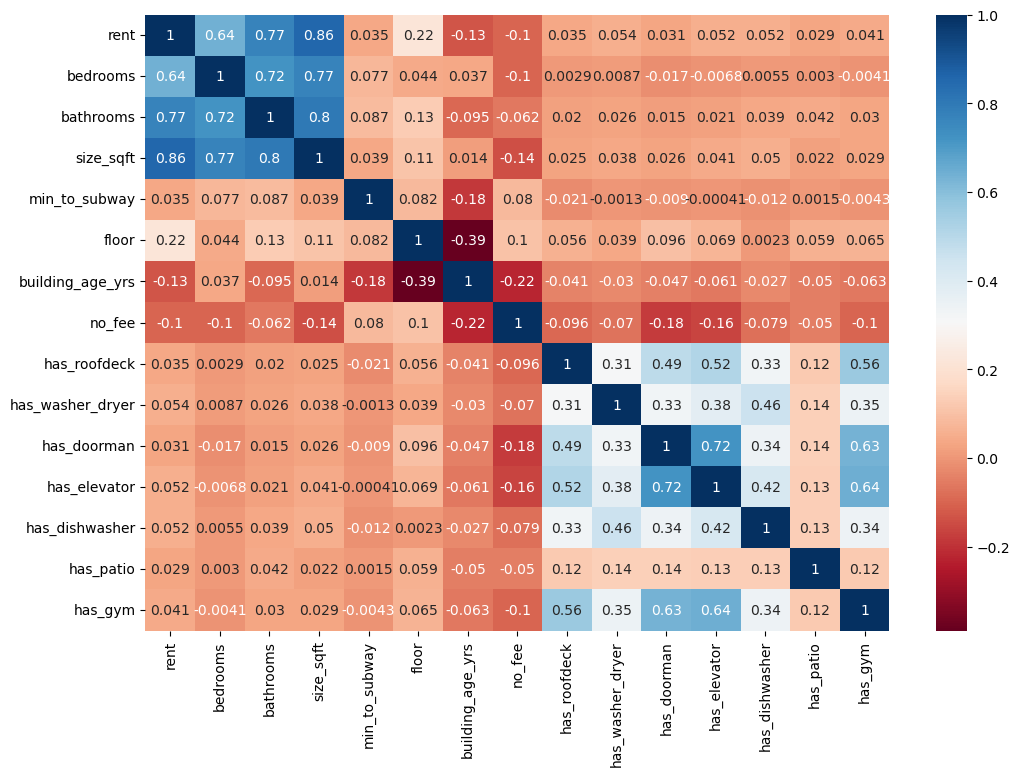

In [3]:
#상관관계 분석
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
corr=df.corr()
sns.heatmap(corr, annot=True, cmap="RdBu")
plt.show()

In [4]:
#LinearRegression모델 만들기
lr=LinearRegression()

In [5]:
#train 데이터와 test 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [7]:
lr.fit(X_train, y_train)
print(f"스케일링 전 정확도: {lr.score(X_test, y_test)}")

스케일링 전 정확도: 0.77430477676575


In [8]:
#변수중요도 출력
f_scores, p_values = f_regression(X_train, y_train)

C:\Users\jylpi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
feat_importance = pd.DataFrame({'feature': X_train.columns, 'f_score': f_scores, 'p_value': p_values})
feat_importance_sorted = feat_importance.sort_values('f_score', ascending=False)
print(feat_importance_sorted)

             feature      f_score        p_value
2          size_sqft  7012.850710   0.000000e+00
1          bathrooms  3714.527840   0.000000e+00
0           bedrooms  1781.281420  1.043010e-293
4              floor   125.266570   2.113484e-28
5   building_age_yrs    43.471086   5.241144e-11
6             no_fee    29.906031   4.989673e-08
10      has_elevator     8.057273   4.569087e-03
11    has_dishwasher     5.691687   1.712025e-02
8   has_washer_dryer     5.606022   1.797533e-02
7       has_roofdeck     5.464205   1.948920e-02
13           has_gym     5.163861   2.314700e-02
3      min_to_subway     5.069943   2.443154e-02
9        has_doorman     4.987925   2.561385e-02
12         has_patio     1.414232   2.344693e-01


상위 5개는 size_sqft,bathrooms,bedrooms,floor,buling_age_yrs로 나왔다.

In [10]:
#X 데이터와 y 데이터 분리
df = df.drop(['no_fee','has_dishwasher','has_washer_dryer','has_doorman','has_elevator','has_roofdeck','has_gym','min_to_subway','has_patio'], axis=1)

X = df.drop(['rent'], axis=1)
y=df[['rent']]

X

,bedrooms,bathrooms,size_sqft,floor,building_age_yrs
0,0.0,1,480,2.0,17
1,2.0,2,2000,1.0,96
2,1.0,1,916,51.0,29
3,1.0,1,975,8.0,31
4,2.0,2,4800,4.0,136
...,...,...,...,...,...
3534,1.0,1,532,8.0,16
3535,2.0,2,988,10.0,9
3536,0.0,1,250,5.0,96
3537,1.0,1,651,5.0,14


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)
lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred= lr.predict(X_test)

from sklearn.metrics import r2_score
r2_score_before = r2_score(y_test, y_pred)

In [12]:
#데이터 스케일링 : 전처리 단계에서 수행
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler,RobustScaler
from sklearn.metrics import accuracy_score

scaling_methods = [StandardScaler(),MinMaxScaler(),MaxAbsScaler(),RobustScaler()]

for scaler in scaling_methods:
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    lr.fit(X_train_scaled, y_train)
    print(f"{type(scaler).__name__} accuracy: {lr.score(X_test_scaled, y_test)}")

StandardScaler accuracy: 0.7726296895853565
MinMaxScaler accuracy: 0.7726296895853565
MaxAbsScaler accuracy: 0.7726296895853565
RobustScaler accuracy: 0.7726296895853565


정확도가 오히려 감소하고 정확도 차이가 같게 나왔다... minmax로 선택하고 진행하였다.

In [16]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
lr_scaled = LinearRegression()
lr_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = lr_scaled.predict(X_test_scaled)
r2_score_after = r2_score(y_test, y_pred_scaled)

Text(0, 0.5, 'y train')

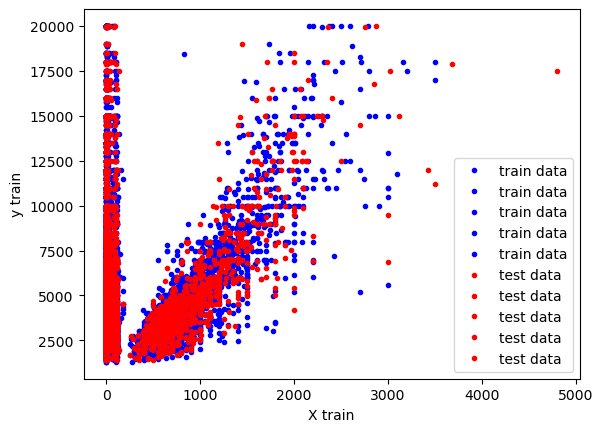

In [17]:
#훈련데이터(파란색)와 테스트데이터(붉은색) 분포 파악하기
plt.plot(X_train, y_train, 'b.', label= "train data")
plt.plot(X_test, y_test, 'r.', label= "test data")
plt.legend()
plt.xlabel('X train')
plt.ylabel('y train')

# 모델 적합

In [18]:
#회귀계수 (기울기와 절편)
[lr.coef_, lr.intercept_]

[array([[-1749.92534692,  5648.4148899 , 16484.26835572,  1946.80410153,
         -1192.39427821]]),
 array([646.80204702])]

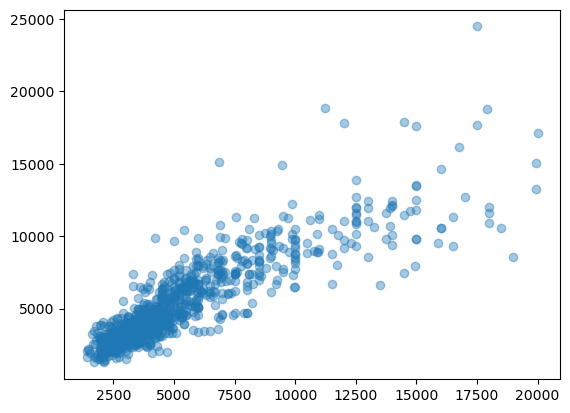

In [19]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred_scaled, alpha = 0.4)
plt.show()

# 변수별 상관 확인
* EDA
* 결과를 보고 나서 EDA하기도 함

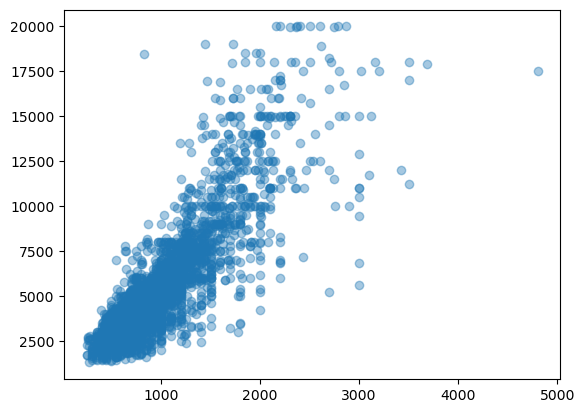

In [23]:
#집 넓이와 집값 간 상관관계
plt.scatter(df[['size_sqft']],df[['rent']], alpha = 0.4)
plt.show()

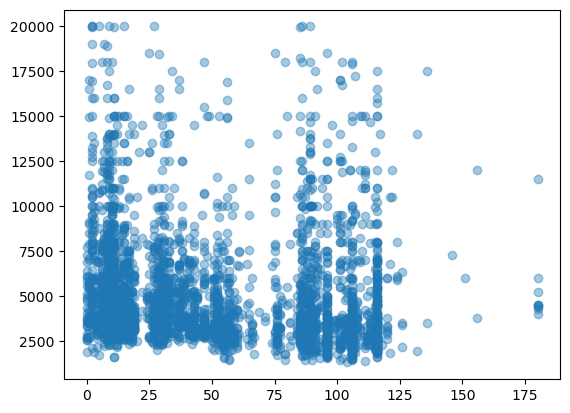

In [24]:
#연식과 집값 간 상관관계
plt.scatter(df[['building_age_yrs']],df[['rent']], alpha = 0.4)
plt.show()

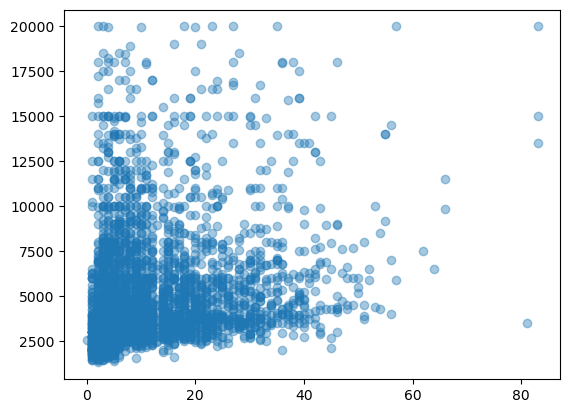

In [25]:
#층수과 집값 간 상관관계
plt.scatter(df[['floor']],df[['rent']], alpha = 0.4)
plt.show()

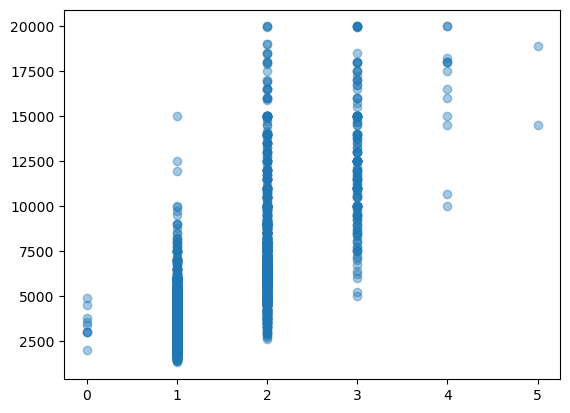

In [26]:
#화장실 수와 집값 간 상관관계
plt.scatter(df[['bathrooms']],df[['rent']], alpha = 0.4)
plt.show()

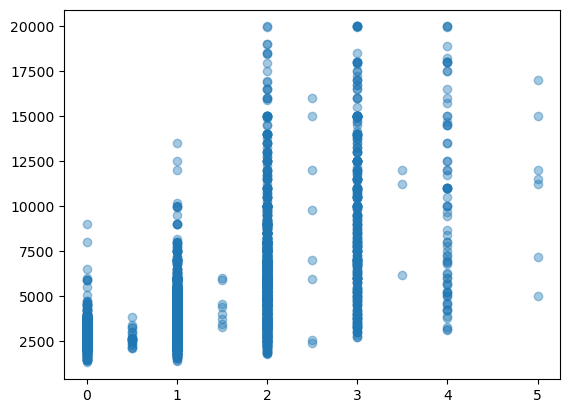

In [27]:
#침실 수와 집값 간 상관관계
plt.scatter(df[['bedrooms']],df[['rent']], alpha = 0.4)
plt.show()

다양한 모형이 나와 신기했다.

# 성능평가

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [30]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2_score_after = r2_score(y_test, y_pred)

In [31]:
print("MAE : %.2f" %mae)
print("MSE : %.2f" %mse)
print("RMSE : %.2f" %rmse)
print("R2 : %.2f" %r2_score_after)

MAE : 951.56
MSE : 2288284.98
RMSE : 1512.71
R2 : 0.77
